# Assignment 2

In [1]:
import numpy as np
import math
from matplotlib import pyplot as py
%matplotlib inline
%run flow_functions.ipynb

## 1. Complex Number Exercises

In [2]:
(2.75 + 3.69*1j)*(8.55-6.13*1j)

(46.1322+14.692000000000004j)

In [3]:
1.4*np.exp(5.32*1j)

(0.79927078585823497-1.1494199453957457j)

In [4]:
(7.51-9.15*1j)/(4.43+9.64*1j)

(-0.4880897698448308-1.0033441577191493j)

# 2. Shapes Created by Jukowski Transformation

In [5]:
#function for returning Jukowski Transformation
def jukowski(z,c):
    """
    Function that returns the Jukowski Transformation
    
    Parameters
    ----------
    z: float
        the function to be mapped on the jukowski transformation
        
    c: float
        parameter for Jukowski transformation
        
    Returns
    ----------
    juko: float
        the jukowski transformation
    """
    juko = z + c**2/z
    return juko

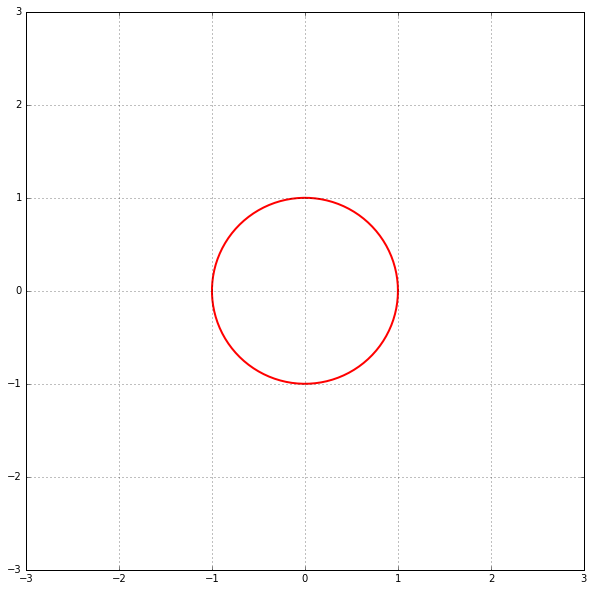

In [6]:
#circle at centre (0,0) and radius = c
r,c,N = 1.0,1.0,100
theta  = np.linspace(0,2*np.pi,N)
z_circ1 = r*np.cos(theta) + r*np.sin(theta)*1j
size = 10
py.figure(figsize=(size,size))
py.xlim(-3,3)
py.ylim(-3,3)
py.grid(True)
py.plot(z_circ1.real,z_circ1.imag, color = 'red',linewidth = 2)

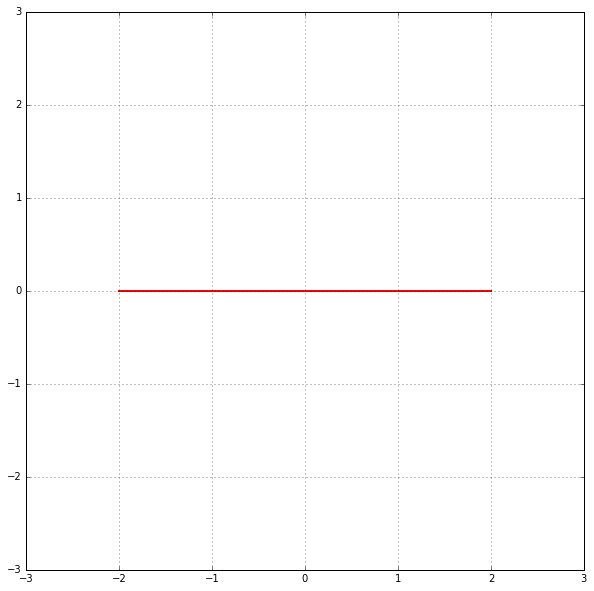

In [7]:
#Jukowski transformation for circle of Radius 1
xi1 = jukowski(z_circ1,c)
py.figure(figsize=(size,size))
py.xlim(-3,3)
py.ylim(-3,3)
py.grid(True)
py.plot(xi1.real,xi1.imag,color = 'red',linewidth = 2)

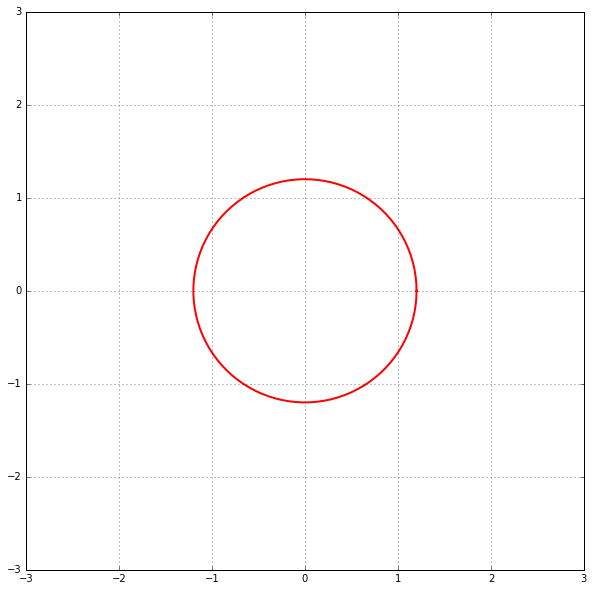

In [8]:
#circle at centre (0,0) and radius > c
r = 1.2
z_circ2 = r*np.cos(theta) + r*np.sin(theta)*1j
py.figure(figsize=(size,size))
py.xlim(-3,3)
py.ylim(-3,3)
py.grid(True)
py.plot(z_circ2.real,z_circ2.imag, color = 'red',linewidth = 2)


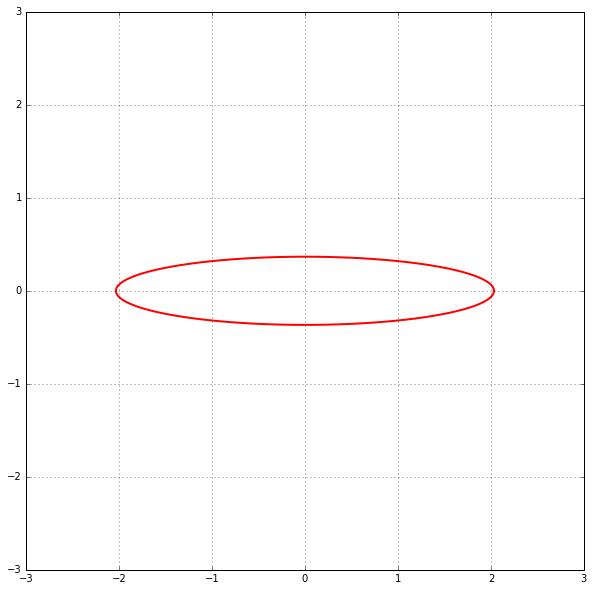

In [9]:
#Jukowski transformation for circle of Radius > 1
xi2 = jukowski(z_circ2,c)
py.figure(figsize=(size,size))
py.xlim(-3,3)
py.ylim(-3,3)
py.grid(True)
py.plot(xi2.real,xi2.imag,color = 'red',linewidth = 2)

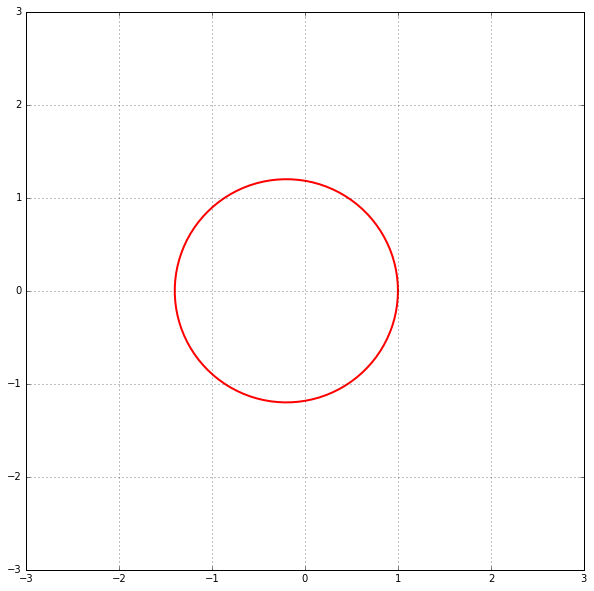

In [10]:
#circle at centre (c-R,0) and radius > 1
r = 1.2
z_circ3 = r*np.cos(theta)+ c-r + r*np.sin(theta)*1j
py.figure(figsize=(size,size))
py.xlim(-3,3)
py.ylim(-3,3)
py.grid(True)
py.plot(z_circ3.real,z_circ3.imag, color = 'red',linewidth = 2)

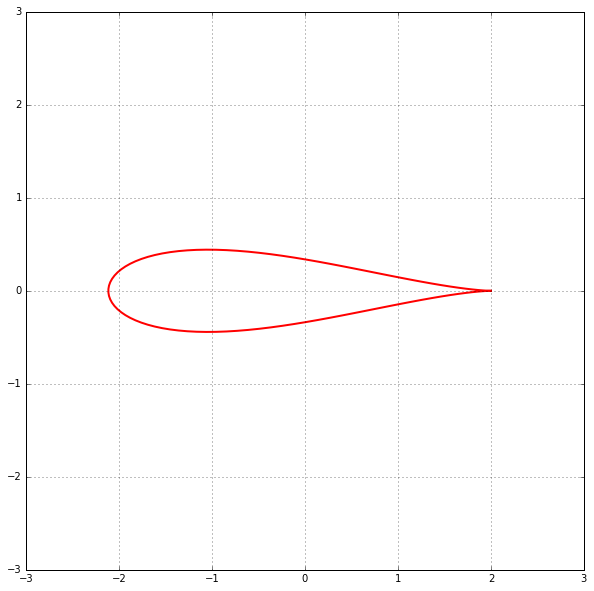

In [11]:
xi3 = jukowski(z_circ3,c)
py.figure(figsize=(size,size))
py.xlim(-3,3)
py.ylim(-3,3)
py.grid(True)
py.plot(xi3.real,xi3.imag,color = 'red',linewidth = 2)

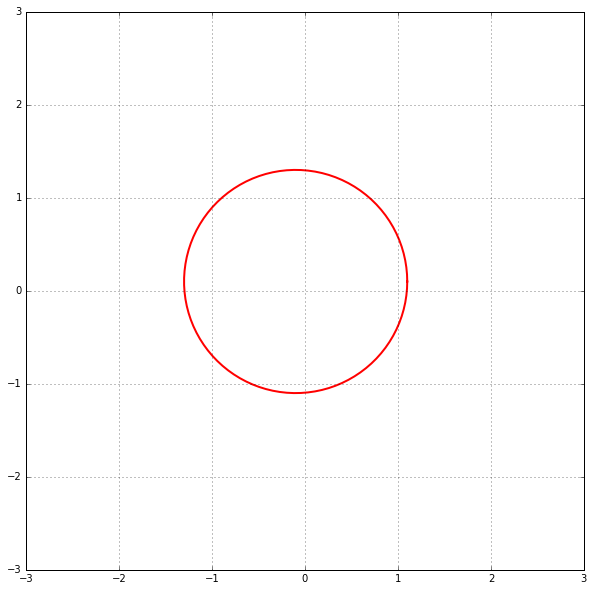

In [12]:
#circle at centre (c-R,0) and radius > 1
r = 1.2
deltax,deltay = 0.1,0.1
z_circ4 = r*np.cos(theta) - deltax + (r*np.sin(theta)+deltay)*1j
py.figure(figsize=(size,size))
py.xlim(-3,3)
py.ylim(-3,3)
py.grid(True)
py.plot(z_circ4.real,z_circ4.imag, color = 'red',linewidth = 2)

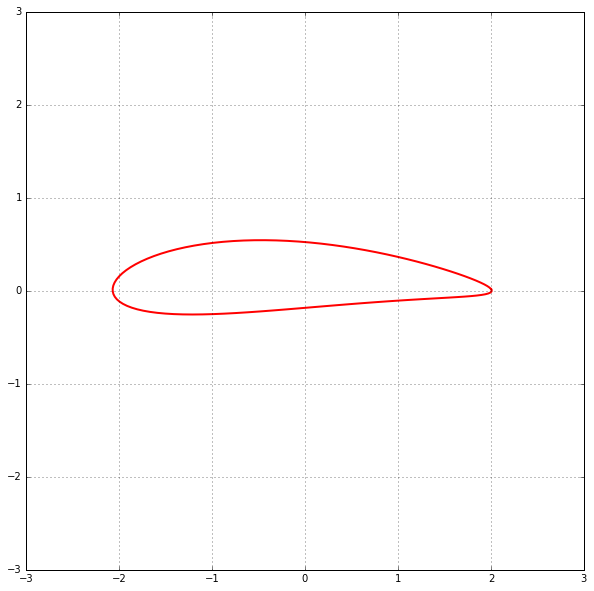

In [13]:
xi4 = jukowski(z_circ4,c)
py.figure(figsize=(size,size))
py.xlim(-3,3)
py.ylim(-3,3)
py.grid(True)
py.plot(xi4.real,xi4.imag,color = 'red',linewidth = 2)

# 3. Grid Points on the z-plane

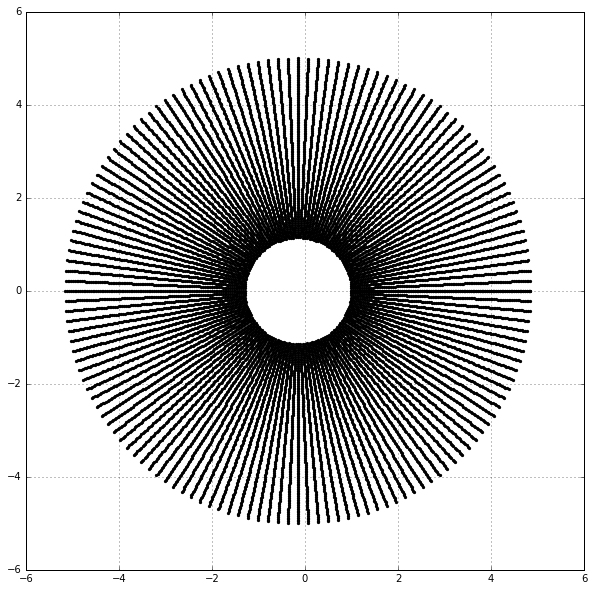

In [14]:
Nr,Ntheta = 100,145
rmin,rmax = 1.15,5.0;
r = np.linspace(rmin,rmax,Nr)
theta = np.linspace(0,2*np.pi,Ntheta)
R,theta1 = np.meshgrid(r,theta)
z = R*np.cos(theta1)+c-rmin + R*np.sin(theta1)*1j
py.figure(figsize = (size,size))
py.grid(1)
py.scatter(z.real,z.imag, color = 'k', s = 5)

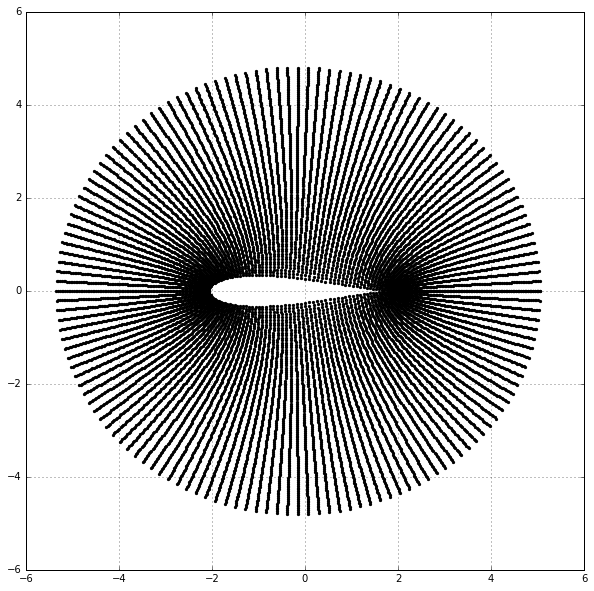

In [15]:
xi = jukowski(z,c)
py.figure(figsize=(size,size))
py.grid(1)
py.scatter(xi.real,xi.imag,color = 'k',s = 5);

# 4. Flow over a Symmetric Jukowski Airfoil

In [16]:
# free stream
u_inf = 1.0
X_z = z.real
Y_z = z.imag
psi_free = u_inf*Y_z

In [226]:
# doublet
strength_doublet = 2*math.pi*rmin**2*u_inf
xd, yd = c-rmin,0
u_doublet,v_doublet,psi_doublet = get_vel_psi_doublet(strength_doublet,xd,yd,X_z,Y_z)

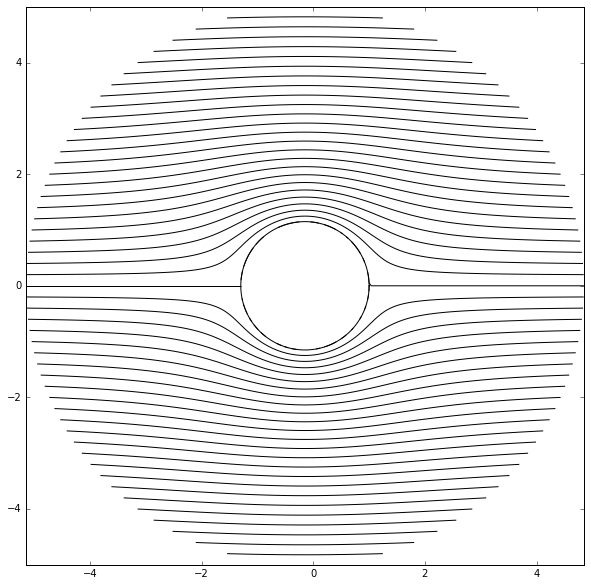

In [18]:
# z-plane
u_z = u_doublet + u_inf
v_z = v_doublet
psi_z = psi_free + psi_doublet
z_inner = rmin*np.cos(theta)+c-rmin + rmin*np.sin(theta)*1j
# plotting
py.figure(figsize=(size,size))
py.contour(X_z,Y_z,psi_z,levels = np.linspace(np.min(psi_z),np.max(psi_z),51),colors = 'k',linestyles = 'solid')
py.plot(z_inner.real,z_inner.imag,color = 'k')

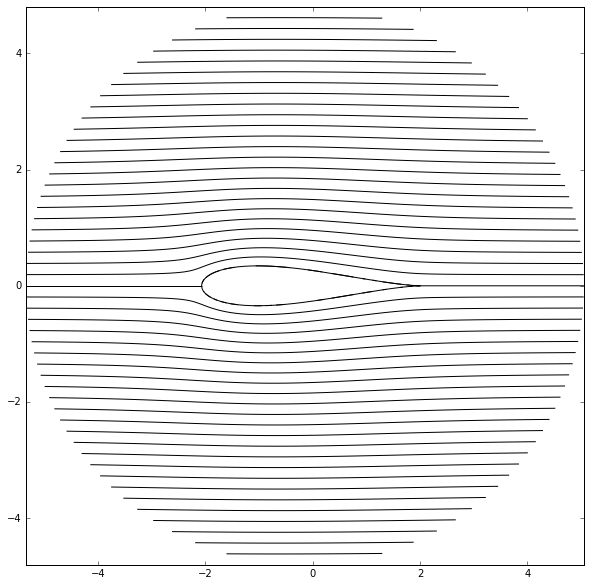

In [19]:
# xi - plane

X_xi,Y_xi = xi.real,xi.imag
psi_xi = psi_z
xi_inner = jukowski(z_inner,c)
#plot
py.figure(figsize=(size,size))
py.contour(X_xi,Y_xi,psi_xi,levels=np.linspace(np.min(psi_xi),np.max(psi_xi),51),colors = 'k',linestyles='solid')
py.plot(xi_inner.real,xi_inner.imag,color='k')

## Velocity Vectors and Pressure Coefficients

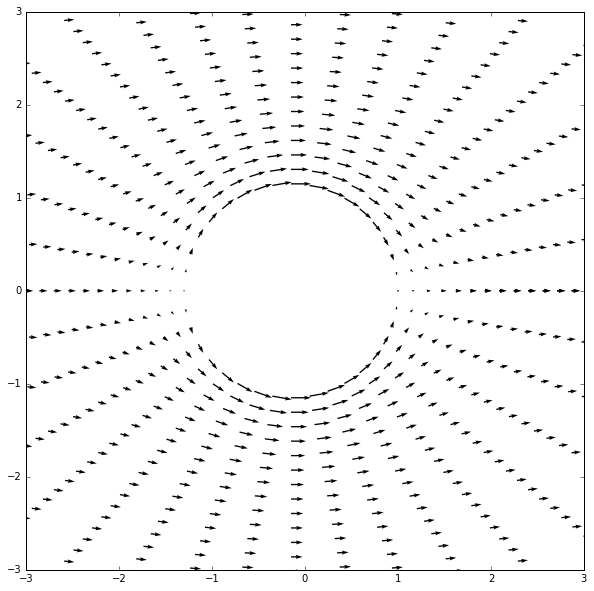

In [20]:
size = 10
py.figure(figsize=(size,size))
py.quiver(X_z[::4,::4],Y_z[::4,::4],u_z[::4,::4],v_z[::4,::4])
py.xlim(-3,3);
py.ylim(-3,3);

/home/gil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


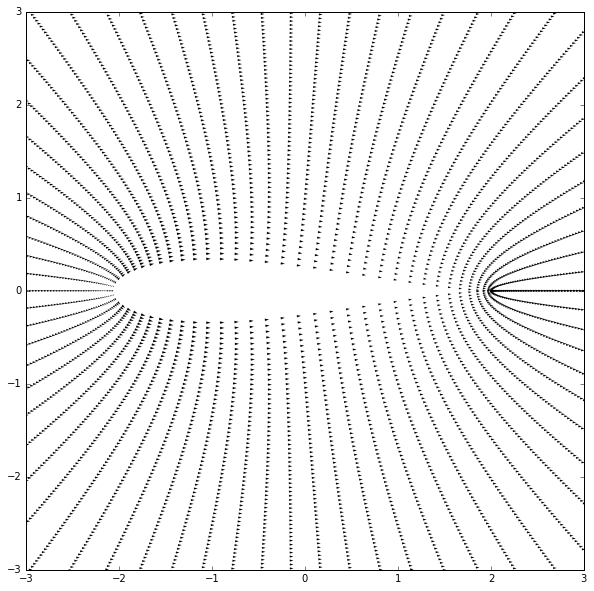

In [21]:
#for xi plane

V_z = u_z - v_z*1j
V_xi = V_z/(1-(c/z)**2);
#plot
py.figure(figsize=(size,size))
py.quiver(X_xi[::2],Y_xi[::2],V_xi.real[::2],-V_xi.imag[::2])
py.xlim(-3,3);
py.ylim(-3,3);

For the 62nd Point on the Airfoil, the values of velocity at the 61st index of the array must be found

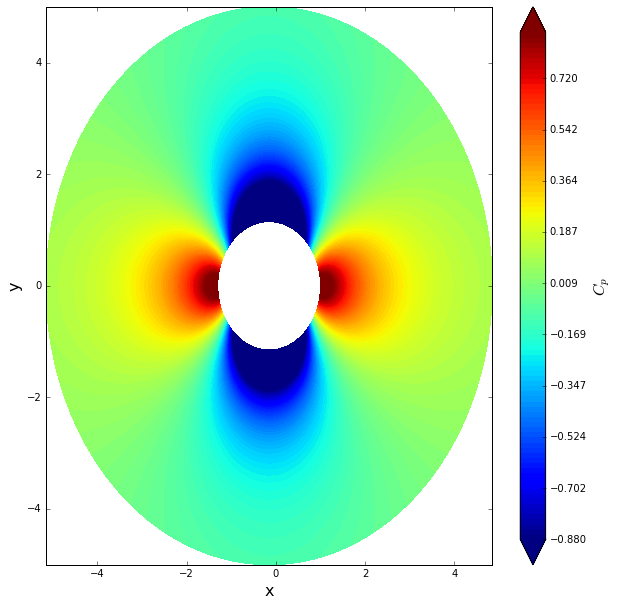

In [119]:
#pressure coefficient in z-plane
cp_z = 1-(u_z**2+v_z**2)/u_inf**2

#plot
py.figure(figsize=(size,size))
py.xlabel('x', fontsize=16)
py.ylabel('y', fontsize=16)

contf = py.contourf(X_z, Y_z, cp_z, levels=np.linspace(-0.88,0.88,100), extend='both')
cbar = py.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

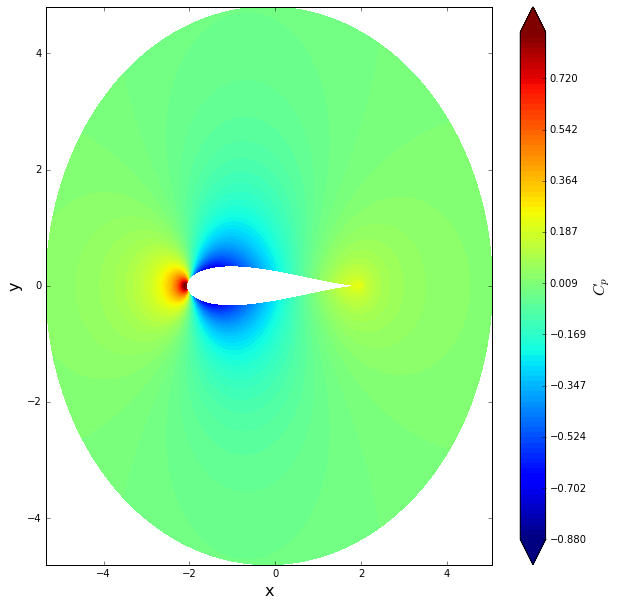

In [24]:
#pressure coefficient in xi-plane
cp_xi = 1-((V_xi.real**2+V_xi.imag**2)/u_inf**2)

#plot
py.figure(figsize=(size,size))
py.xlabel('x', fontsize=16)
py.ylabel('y', fontsize=16)

contf = py.contourf(X_xi, Y_xi, cp_xi, levels=np.linspace(-0.88,0.88,100), extend='both')
cbar = py.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

1) What is the strength of the doublet?

In [227]:
strength_doublet

8.309512568745001

2) What is the velocity at 62nd point on the airfoil surface? 

In [228]:
V_xi[61,0]

(1.1063384662852436-0.52363334929849692j)

3) What is the minimum value of the pressure coefficient on the airfoil surface?

In [25]:
np.min(cp_xi[1:,0])

-0.68775567409240423

# 5. Flow over a symmetric Joukowski airfoil with non-zero angle of attack, without circulation

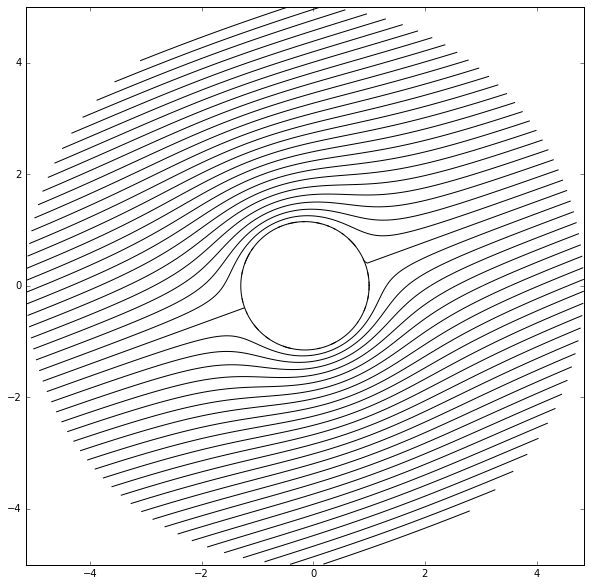

In [47]:
#transforming to z' plane
aoa = 20*math.pi/180
xc = c-rmin
x_prime = (X_z-xc)*np.cos(aoa) + Y_z*np.sin(aoa)
y_prime = -(X_z-xc)*np.sin(aoa) + Y_z*np.cos(aoa)
x_doublet_new,y_doublet_new = 0,0
u_doublet_prime,v_doublet_prime,psi_doublet_prime = get_vel_psi_doublet(strength_doublet,x_doublet_new,y_doublet_new,x_prime,y_prime)

#with the free stream
u_prime = u_doublet_prime + u_inf
psi_free_prime = u_inf*y_prime
psi_prime = psi_doublet_prime + psi_free_prime
#plotting
py.figure(figsize=(size,size))
py.contour(X_z,Y_z,psi_prime,levels = np.linspace(np.min(psi_prime),np.max(psi_prime),51),colors = 'k',linestyles = 'solid')
py.plot(z_inner.real,z_inner.imag,color = 'k')

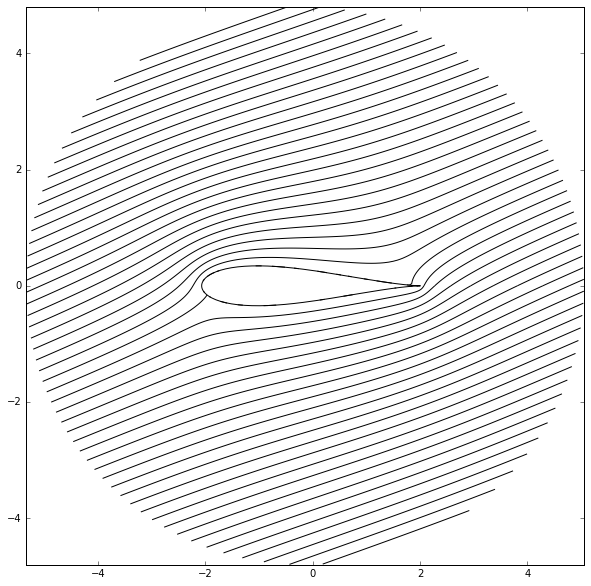

In [229]:
# for airfoil
py.figure(figsize=(size,size))
py.contour(X_xi,Y_xi,psi_prime,levels = np.linspace(np.min(psi_prime),np.max(psi_prime),51),colors = 'k',linestyles = 'solid')
py.plot(xi_inner.real,xi_inner.imag,color = 'k')

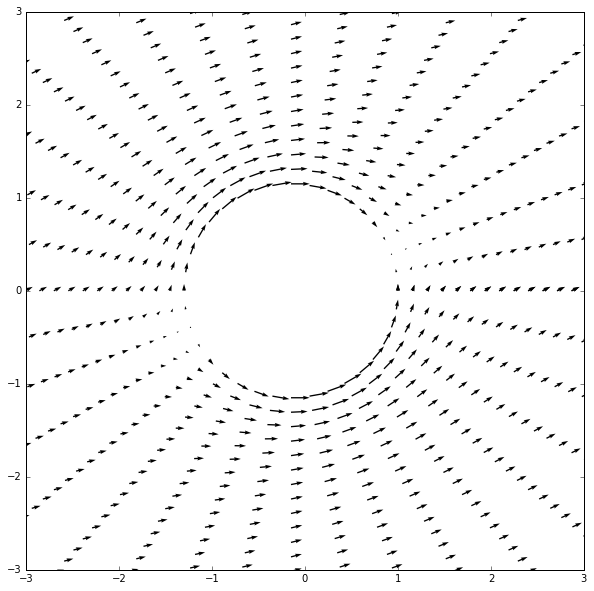

In [53]:
#quiver in z-plane
V_z_new = (u_prime - v_doublet_prime*1j)*np.exp(-aoa*1j)
py.figure(figsize=(size,size))
py.quiver(X_z[::4,::4],Y_z[::4,::4],V_new.real[::4,::4],-V_new.imag[::4,::4])
py.xlim(-3,3);
py.ylim(-3,3);

/home/gil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


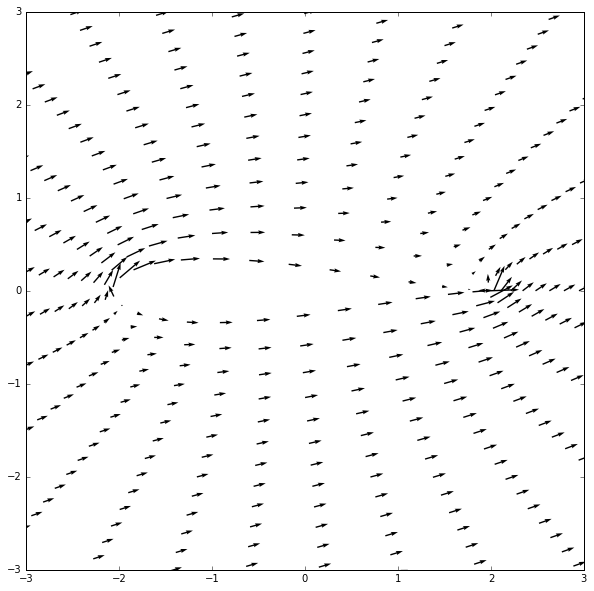

In [192]:
#quiver in xi-plane
V_xi_new = V_z_new/(1-(c/z)**2);
#plot
py.figure(figsize=(size,size))

py.quiver(X_xi[::5,::5],Y_xi[::5,::5],V_xi_new.real[::5,::5],-V_xi_new.imag[::5,::5])
py.xlim(-3,3);
py.ylim(-3,3);

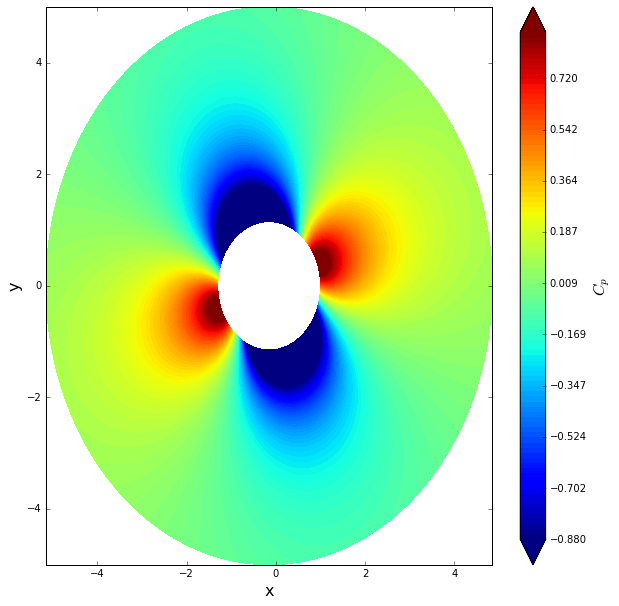

In [118]:
#pressure coefficient in z-plane
cp_z_new = 1-(V_z_new.real**2 + V_z_new.imag**2)/u_inf**2

#plot
py.figure(figsize=(size,size))
py.xlabel('x', fontsize=16)
py.ylabel('y', fontsize=16)

contf = py.contourf(X_z, Y_z, cp_z_new, levels=np.linspace(-0.88,0.88,100), extend='both')
cbar = py.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

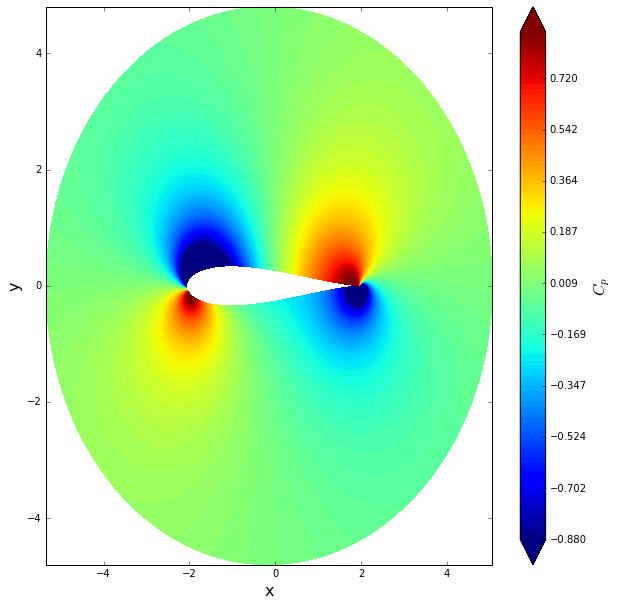

In [78]:
#pressure coefficient in xi plane
cp_xi_new = 1-((V_xi_new.real**2+V_xi_new.imag**2)/u_inf**2)

#plot
py.figure(figsize=(size,size))
py.xlabel('x', fontsize=16)
py.ylabel('y', fontsize=16)

contf = py.contourf(X_xi, Y_xi, cp_xi_new, levels=np.linspace(-0.88,0.88,100), extend='both')
cbar = py.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

1) Do you think the flow over the airfoil we obtained here is reasonable? Why or why not?

Ans: No. 

2) Where are the stagnation points on the airfoil?

In [137]:
np.where(np.abs(V_xi_new.real[:,0]) < 1e-15)

(array([ 8, 80]),)

Velocity at the 50th point on the airfoil surface

3) How much is the lift?

Ans: Zero. Since there is no circulation, there will be no lift.

4) How much is the drag?

Ans: Zero. Since potential flow is assumed, the pressure distribution over the surface of the airfoil is symmetric and there will be no drag. 

5) What is the velocity at the 50th point on the airfoil surface?

In [81]:
V_xi_new[49,0]

(1.4830654150147842-0.092075495007288205j)

6) What is the pressure coefficient at the 75th point on the airfoil surface?

In [80]:
cp_xi_new[74,0]

-0.48520991643725964

# 6. Flow over a symmetric Joukowski airfoil with non-zero angle of attack, with circulation

For calculating the strength of the vortex:
Since it is known that the stagnation point has to move 20 degrees from the free stream, we can use the location of the stagnation points in polar co-ordinates to calculate the strength of the vortex by setting the velocity at the stagnation point equal to zero.

In [230]:
# calculating strength of vortex
strength_vortex = -strength_doublet*np.sin(-2*aoa)/(rmin*np.cos(-aoa))
x_vortex,y_vortex = 0,0
u_vortex,v_vortex,psi_vortex = get_vel_psi_vortex(strength_vortex,x_vortex,y_vortex,x_prime,y_prime)

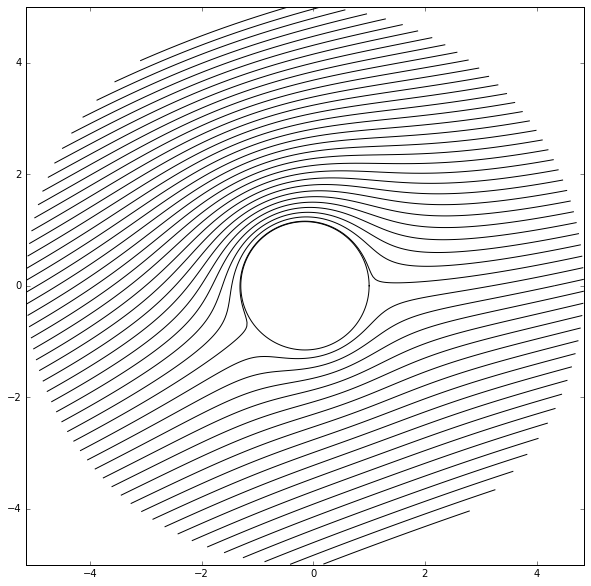

In [115]:
#superimposing doublet and free stream
u_circulation = u_vortex + u_prime
v_circulation = v_vortex + v_doublet_prime
psi_circulation = psi_vortex + psi_prime

V_z_circulation = (u_circulation - v_circulation*1j)*np.exp(-aoa*1j)

#plotting
py.figure(figsize=(size,size))
py.contour(X_z,Y_z,psi_circulation,levels = np.linspace(np.min(psi_circulation),np.max(psi_circulation),51),colors = 'k',linestyles = 'solid')
py.plot(z_inner.real,z_inner.imag,color = 'k')

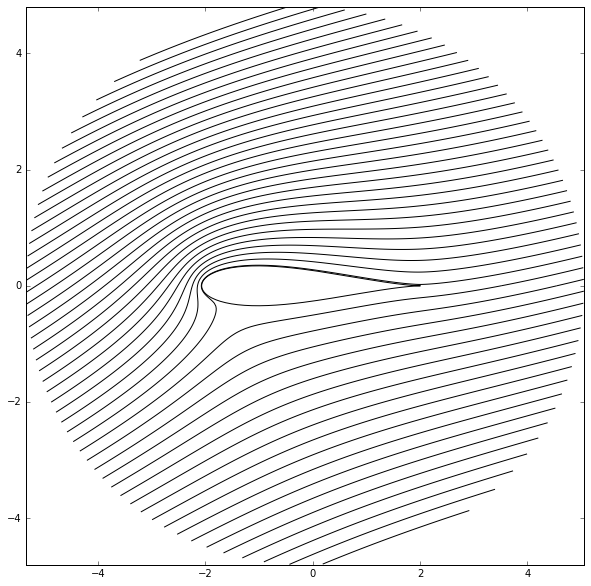

In [110]:
# plotting in the xi plane
py.figure(figsize=(size,size))
py.contour(X_xi,Y_xi,psi_circulation,levels = np.linspace(np.min(psi_circulation),np.max(psi_circulation),51),colors = 'k',linestyles = 'solid')
py.plot(xi_inner.real,xi_inner.imag,color = 'k')


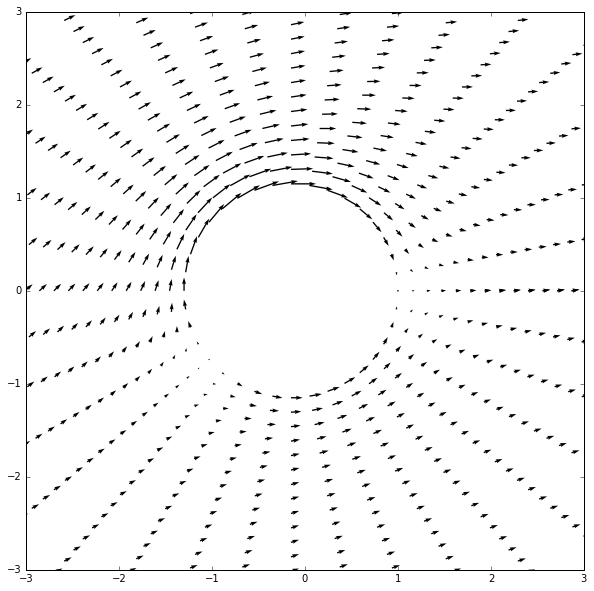

In [120]:
# quiver in z-plane
py.figure(figsize=(size,size))
py.quiver(X_z[::5,::5],Y_z[::5,::5],V_z_circulation.real[::5,::5],-V_z_circulation.imag[::5,::5])
py.xlim(-3,3);
py.ylim(-3,3);

/home/gil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


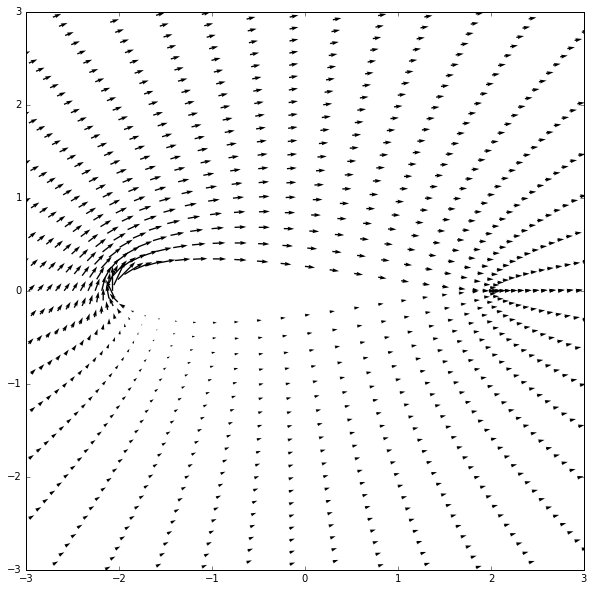

In [132]:
#quiver in xi plane
V_xi_circulation = V_z_circulation/(1-(c/z)**2);
#plot
py.figure(figsize=(size,size))

py.quiver(X_xi[::3,::3],Y_xi[::3,::3],V_xi_circulation.real[::3,::3],-V_xi_circulation.imag[::3,::3])
py.xlim(-3,3);
py.ylim(-3,3);

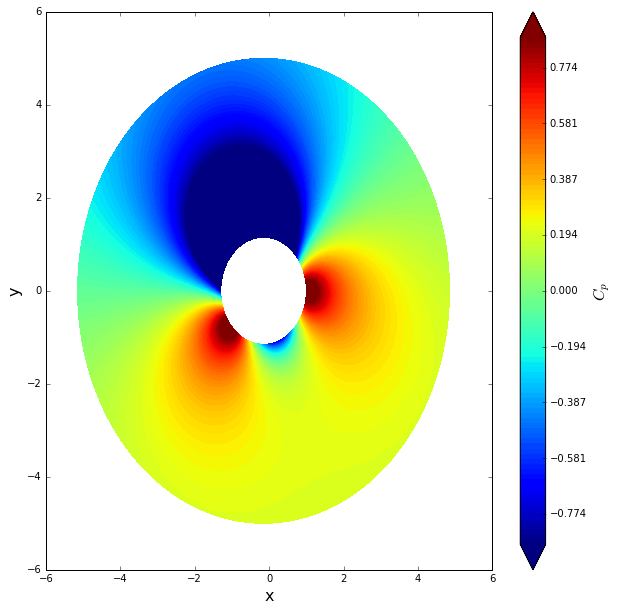

In [170]:
#pressure coefficient in z-plane
cp_z_circulation = 1-(V_z_circulation.real**2 + V_z_circulation.imag**2)/u_inf**2

#plot
py.figure(figsize=(size,size))
py.xlabel('x', fontsize=16)
py.ylabel('y', fontsize=16)
py.xlim(-6,6)
py.ylim(-6,6)
contf = py.contourf(X_z, Y_z, cp_z_circulation, levels=np.linspace(-0.88,0.88,101), extend='both')
cbar = py.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

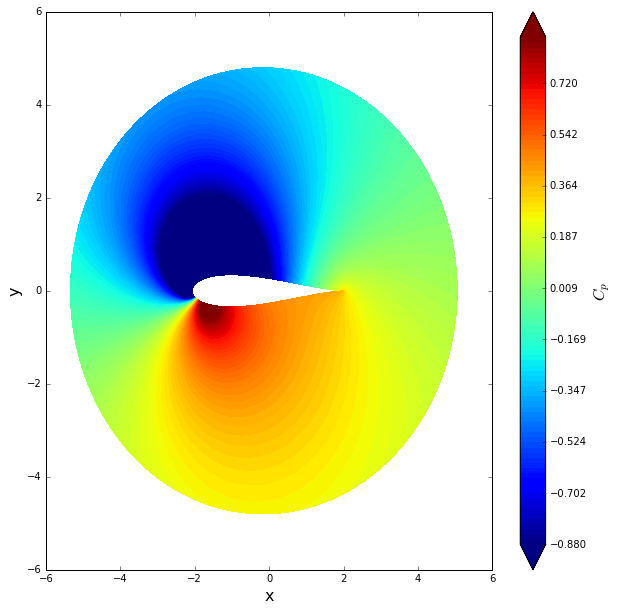

In [171]:
#pressure coefficient in xi plane
cp_xi_circulation = 1-((V_xi_circulation.real**2+V_xi_circulation.imag**2)/u_inf**2)

#plot
py.figure(figsize=(size,size))
py.xlabel('x', fontsize=16)
py.ylabel('y', fontsize=16)
py.xlim(-6,6)
py.ylim(-6,6)
contf = py.contourf(X_xi, Y_xi, cp_xi_circulation, levels=np.linspace(-0.88,0.88,100), extend='both')
cbar = py.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)

1) What is the strength of the vortex?

In [231]:
strength_vortex

4.9426446603975833

2) What is the lift?

The lift in the z-plane and the xi-plane should be equal. By using the Kutta-Jukowski condition for lift on a cylinder with free stream and circulation (assuming density of air = 1 kg/m3), we can calculate the lift component which is perpendicular to the free stream and the vertical component in the z-plane can be calculated accordingly.

In [190]:
#lift calculation
ro = 1.0
L = ro*u_inf*strength_vortex
L*np.cos(aoa)

4.6445667145424814

3) How much is the drag?

Ans: The drag in the direction of free stream (i.e. the z' plane) should be zero as all the terms in the integral will go to zero. However that does not seem to be the case as the assignment on openedx does not accept zero as the solution.

4) Where are the stagnation points on the airfoil? 

In [254]:
np.where(np.abs(V_xi_circulation[:,0]) < 1e-10)

(array([88]),)

The second stagnation point is at the trailing edge (1st point on the airfoil surface) which is not detected by this numpy where function for the given condition since the value is infinity.

5) What is the velocity at the 92th point on the airfoil surface?

In [133]:
V_xi_circulation[91,0]

(0.20848311620747642+0.031988389195052508j)

6) What is the pressure coefficient at the 111th point on the airfoil surface?

In [134]:
cp_xi_circulation[110,0]

0.49669467238347365

7.) What is going on with the Pressure Coefficient at the Trailing Edge?

The pressure coefficient computed is going to negative infinity because the velocity at the trailing edge is calculated as infinity while shifting from z to z' plane. However, the pressure should be a finite value which is not accounted for due to our potential flow approximation which discounts viscous effects.